In [31]:
import shutil

tesseract_path = shutil.which('tesseract')
print(tesseract_path)

None


In [30]:
import pytesseract

# Verify the Tesseract version
print(pytesseract.get_tesseract_version())

5.3.1.20230401


In [32]:
import pytesseract

# Specify the full path to the Tesseract executable
tesseract_executable = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Set the Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = tesseract_executable

# Now you can use pytesseract for OCR as usual

In [33]:
# Path to the folder containing images
folder_path = "C:/Users/mhajj/Documents/RUTILEA/aisin/GearInspection-Dataset3/PredictionResults/Test"

In [34]:
import os
from PIL import Image
import re

In [69]:
# Function to count text occurrences in an image
def count_text_occurrences(image_path):
    # Open the image using PIL (Python Imaging Library)
    image = Image.open(image_path)
    
    # Use Tesseract to extract text from the image
    extracted_text = pytesseract.image_to_string(image)
    
    # Convert the extracted text to lowercase for case-insensitive matching
    extracted_text_lower = extracted_text.lower()
    
    # Print the extracted text for debugging
    print(f"Extracted text from {image_path}: {extracted_text}")
    
    # Count occurrences of "Kizu" and "Dakon" in the extracted text
    kizu_count = extracted_text_lower.count('kizu')
    dakon_count = extracted_text_lower.count('dakon')
    
    return kizu_count, dakon_count

In [71]:
# Initialize counters for different text categories
total_kizu_count = 0
total_dakon_count = 0
total_other_text_count = 0

# Loop through each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, filename)
        
        # Count text occurrences in the image
        kizu_count, dakon_count = count_text_occurrences(image_path)
        
        # Print counts for debugging
        print(f"Counts for {image_path}: Kizu: {kizu_count}, Dakon: {dakon_count}")
        
        # Increment the respective counters
        total_kizu_count += kizu_count
        total_dakon_count += dakon_count

# Calculate the count of other text
total_other_text_count = len(os.listdir(folder_path)) - (total_kizu_count + total_dakon_count)

# Print the counts for each category
print(f"Images with 'Kizu' text: {total_kizu_count}")
print(f"Images with 'Dakon' text: {total_dakon_count}")
print(f"Images with other text: {total_other_text_count}")

Extracted text from C:/Users/mhajj/Documents/RUTILEA/aisin/GearInspection-Dataset3/PredictionResults/Test\year=2023-month=04-day=01-04_24_17-OK-2_0.png.png: kizu 0.72


Counts for C:/Users/mhajj/Documents/RUTILEA/aisin/GearInspection-Dataset3/PredictionResults/Test\year=2023-month=04-day=01-04_24_17-OK-2_0.png.png: Kizu: 1, Dakon: 0
Extracted text from C:/Users/mhajj/Documents/RUTILEA/aisin/GearInspection-Dataset3/PredictionResults/Test\year=2023-month=04-day=03-11_19_27-OK-2_6.png.png: 
Counts for C:/Users/mhajj/Documents/RUTILEA/aisin/GearInspection-Dataset3/PredictionResults/Test\year=2023-month=04-day=03-11_19_27-OK-2_6.png.png: Kizu: 0, Dakon: 0
Extracted text from C:/Users/mhajj/Documents/RUTILEA/aisin/GearInspection-Dataset3/PredictionResults/Test\year=2023-month=04-day=03-11_19_53-OK-2_5.png.png: 
Counts for C:/Users/mhajj/Documents/RUTILEA/aisin/GearInspection-Dataset3/PredictionResults/Test\year=2023-month=04-day=03-11_19_53-OK-2_5.png.png: Kizu: 0, Dakon: 0
Extracted text fr

In [1]:
# check the bounded box of the image

import cv2
import numpy as np

In [2]:
image = cv2.imread('dataset\\train\\005.jpg')

In [3]:
x1, y1 = 100, 100  # Top-left corner
x2, y2 = 300, 300  # Bottom-right corner

In [4]:
# Draw the bounding box rectangle
color = (0, 255, 0)  # BGR color (green in this example)
thickness = 2  # Line thickness
cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

array([[[185, 199, 218],
        [191, 205, 224],
        [198, 212, 230],
        ...,
        [218, 229, 243],
        [178, 187, 200],
        [154, 163, 176]],

       [[197, 210, 232],
        [193, 207, 226],
        [191, 205, 224],
        ...,
        [218, 229, 243],
        [177, 186, 199],
        [153, 162, 175]],

       [[177, 189, 213],
        [170, 183, 205],
        [175, 188, 210],
        ...,
        [217, 228, 242],
        [176, 185, 198],
        [153, 162, 175]],

       ...,

       [[ 93, 110, 123],
        [ 93, 110, 123],
        [ 93, 110, 123],
        ...,
        [122, 138, 151],
        [120, 136, 149],
        [119, 135, 148]],

       [[ 93, 110, 123],
        [ 93, 110, 123],
        [ 93, 110, 123],
        ...,
        [123, 139, 152],
        [121, 137, 150],
        [120, 136, 149]],

       [[ 93, 110, 123],
        [ 93, 110, 123],
        [ 93, 110, 123],
        ...,
        [124, 140, 153],
        [123, 139, 152],
        [122, 138, 151]]

In [5]:
cv2.imshow('Image with Bounding Box', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


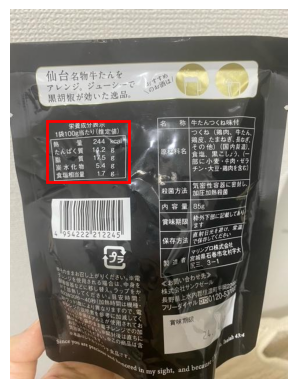

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Open the image
image = Image.open('dataset\\train\\236.jpg')

# Create a figure and axis for plotting
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Define coordinates for the bounding box (x1, y1) and (x2, y2)
x1, y1 = 63.643835616438366, 192.15068493150685  # Top-left corner
x2, y2 = 206.1095890410959, 297.63013698630135  # Bottom-right corner

# Create a Rectangle patch with the specified coordinates
bbox = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')

# Add the bounding box to the plot
ax.add_patch(bbox)

# Hide axis
ax.axis('off')

# Show the plot with the bounding box
plt.show()

In [9]:
plt.imwrite('image_with_bbox.jpg', image)

AttributeError: module 'matplotlib.pyplot' has no attribute 'imwrite'